In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

In [3]:
import shutil
import os

working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/finance/'
os.chdir(working_dir)
dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
print(dirs)

working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/finance_stein/'
os.chdir(working_dir)
dirs_stein = []
for d in os.listdir():
    if '__complete' in d:
        dirs_stein.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs_stein)

['seed_5__complete', 'seed_8__complete', 'seed_3__complete', 'seed_4__complete', 'seed_9__complete', 'seed_2__complete', 'seed_7__complete', 'seed_1__complete', 'seed_6__complete', 'seed_10__complete']
['seed_5__complete', 'seed_8__complete', 'seed_3__complete', 'seed_4__complete', 'seed_9__complete', 'seed_2__complete', 'seed_7__complete', 'seed_1__complete', 'seed_6__complete']


In [5]:
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/'
os.chdir(working_dir)

dir_num = len(dirs)
dir_stein_num = len(dirs_stein)

# Nx_array = [5, 10]
Nx_array = [5, 10, 20, 30]
# Ny_array = [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Ny_array = [10, 30, 50]
Ny_array = np.arange(3, 100, 3)

MSE_dict = {}


for Nx in Nx_array:
    MSE_dict_temp = {}
    
    MSE_dict_temp['BMC stein mean'] = []
    MSE_dict_temp['BMC stein se'] = []
    MSE_dict_temp['BMC mean'] = []
    MSE_dict_temp['BMC se'] = []
    MSE_dict_temp['LSMC mean'] = []
    MSE_dict_temp['LSMC se'] = []
    MSE_dict_temp['IS mean'] = []
    MSE_dict_temp['IS se'] = []
    MSE_dict_temp['KMS mean'] = []
    MSE_dict_temp['KMS se'] = []
    
    for Ny in Ny_array:
        mse_BMC_stein = np.zeros(dir_stein_num)
        for l, d in enumerate(dirs_stein):
            with open(f'./finance_stein/{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_BMC_stein[l] = dict_all['BMC']
            
        MSE_dict_temp['BMC stein mean'].append(mse_BMC_stein.mean())
        MSE_dict_temp['BMC stein se'].append(scipy.stats.sem(mse_BMC_stein))
        
        mse_BMC = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_BMC[l] = dict_all['BMC']
            
        MSE_dict_temp['BMC mean'].append(mse_BMC.mean())
        MSE_dict_temp['BMC se'].append(scipy.stats.sem(mse_BMC))
        
        mse_LSMC = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_LSMC[l] = dict_all['LSMC']
            
        MSE_dict_temp['LSMC mean'].append(mse_LSMC.mean())
        MSE_dict_temp['LSMC se'].append(scipy.stats.sem(mse_LSMC))
        
        mse_IS = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_IS[l] = dict_all['IS']
            
        MSE_dict_temp['IS mean'].append(mse_IS.mean())
        MSE_dict_temp['IS se'].append(scipy.stats.sem(mse_IS))
        
        mse_KMS = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_KMS[l] = dict_all['KMS']
            
        MSE_dict_temp['KMS mean'].append(mse_KMS.mean())
        MSE_dict_temp['KMS se'].append(scipy.stats.sem(mse_KMS))
        
    
    MSE_dict_temp['BMC stein mean'] = np.array(MSE_dict_temp['BMC stein mean'])
    MSE_dict_temp['BMC stein se'] = np.array(MSE_dict_temp['BMC stein se'])
    
    MSE_dict_temp['BMC mean'] = np.array(MSE_dict_temp['BMC mean'])
    MSE_dict_temp['BMC se'] = np.array(MSE_dict_temp['BMC se'])
    
    MSE_dict_temp['LSMC mean'] = np.array(MSE_dict_temp['LSMC mean'])
    MSE_dict_temp['LSMC se'] = np.array(MSE_dict_temp['LSMC se'])    
    
    MSE_dict_temp['IS mean'] = np.array(MSE_dict_temp['IS mean'])
    MSE_dict_temp['IS se'] = np.array(MSE_dict_temp['IS se'])
    
    MSE_dict_temp['KMS mean'] = np.array(MSE_dict_temp['KMS mean'])
    MSE_dict_temp['KMS se'] = np.array(MSE_dict_temp['KMS se'])
    
    MSE_dict[f"{Nx}"] = MSE_dict_temp
    


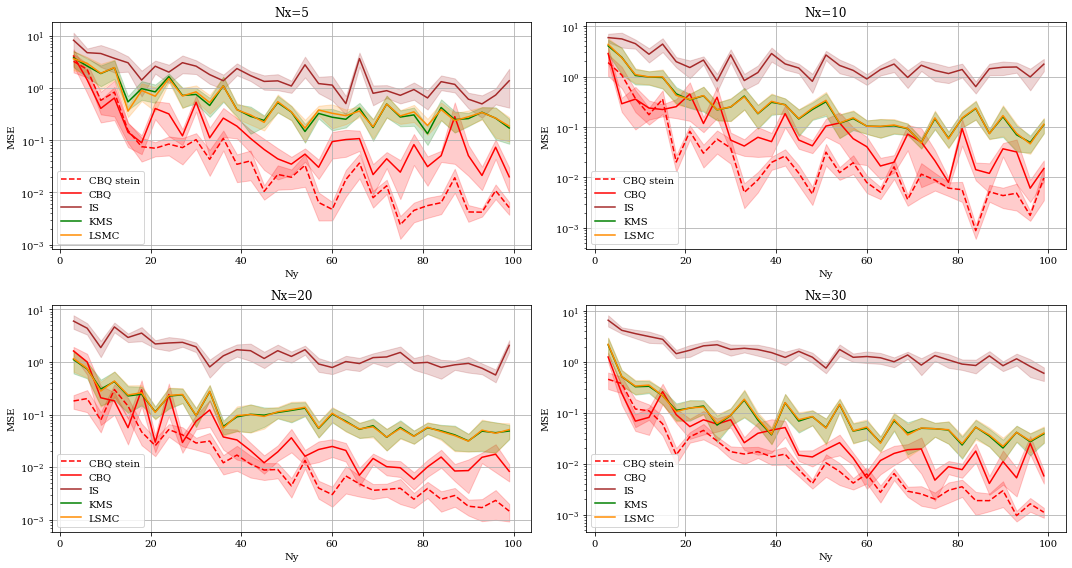

In [8]:
fig, axs = plt.subplots(int(len(Nx_array) / 2), 2, figsize=(15, len(Nx_array) * 2))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['BMC stein mean'], color='r', label=f'CBQ stein', linestyle='--')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['BMC stein mean'] - MSE_dict[f"{Nx}"]['BMC stein se'], 
                        MSE_dict[f"{Nx}"]['BMC stein mean'] + MSE_dict[f"{Nx}"]['BMC stein se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['BMC mean'] - MSE_dict[f"{Nx}"]['BMC se'], 
                        MSE_dict[f"{Nx}"]['BMC mean'] + MSE_dict[f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['IS mean'] - MSE_dict[f"{Nx}"]['IS se'], 
                        MSE_dict[f"{Nx}"]['IS mean'] + MSE_dict[f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['KMS mean'] - MSE_dict[f"{Nx}"]['KMS se'], 
                        MSE_dict[f"{Nx}"]['KMS mean'] + MSE_dict[f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['LSMC mean'] - MSE_dict[f"{Nx}"]['LSMC se'], 
                        MSE_dict[f"{Nx}"]['LSMC mean'] + MSE_dict[f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.tight_layout()
plt.show()

In [ ]:

a kernel that can be inverted in linear time, for uniform samples.

Make the linear regression more expensive.

show the heatmap for CBQ

MSE vs cost plot. 

The optimal amplitude for Ky kernel has a closed form

In [ ]:
plot the median, take out the best and the worst, 

In [9]:
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/'
os.chdir(working_dir)

dir_num = len(dirs)
dir_stein_num = len(dirs_stein)

# Nx_array = [5, 10]
Nx_array = [5, 10, 20, 30]
# Ny_array = [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Ny_array = [10, 30, 50]
Ny_array = np.arange(3, 100, 3)

Time_dict = {}


for Nx in Nx_array:
    Time_dict_temp = {}
    
    Time_dict_temp['BMC stein mean'] = []
    Time_dict_temp['BMC stein se'] = []
    Time_dict_temp['BMC mean'] = []
    Time_dict_temp['BMC se'] = []
    Time_dict_temp['LSMC mean'] = []
    Time_dict_temp['LSMC se'] = []
    Time_dict_temp['IS mean'] = []
    Time_dict_temp['IS se'] = []
    Time_dict_temp['KMS mean'] = []
    Time_dict_temp['KMS se'] = []
    
    for Ny in Ny_array:
        time_BMC_stein = np.zeros(dir_stein_num)
        for l, d in enumerate(dirs_stein):
            with open(f'./finance_stein/{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_BMC_stein[l] = dict_all['BMC']
            
        Time_dict_temp['BMC stein mean'].append(time_BMC_stein.mean())
        Time_dict_temp['BMC stein se'].append(scipy.stats.sem(time_BMC_stein))
        
        time_BMC = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_BMC[l] = dict_all['BMC']
            
        Time_dict_temp['BMC mean'].append(time_BMC.mean())
        Time_dict_temp['BMC se'].append(scipy.stats.sem(time_BMC))
        
        time_LSMC = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_LSMC[l] = dict_all['LSMC']
            
        Time_dict_temp['LSMC mean'].append(time_LSMC.mean())
        Time_dict_temp['LSMC se'].append(scipy.stats.sem(time_LSMC))
        
        time_IS = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_IS[l] = dict_all['IS']
            
        Time_dict_temp['IS mean'].append(time_IS.mean())
        Time_dict_temp['IS se'].append(scipy.stats.sem(time_IS))
        
        time_KMS = np.zeros(dir_num)
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_KMS[l] = dict_all['KMS']
            
        Time_dict_temp['KMS mean'].append(time_KMS.mean())
        Time_dict_temp['KMS se'].append(scipy.stats.sem(time_KMS))
        
    
    Time_dict_temp['BMC stein mean'] = np.array(Time_dict_temp['BMC stein mean'])
    Time_dict_temp['BMC stein se'] = np.array(Time_dict_temp['BMC stein se'])
    
    Time_dict_temp['BMC mean'] = np.array(Time_dict_temp['BMC mean'])
    Time_dict_temp['BMC se'] = np.array(Time_dict_temp['BMC se'])
    
    Time_dict_temp['LSMC mean'] = np.array(Time_dict_temp['LSMC mean'])
    Time_dict_temp['LSMC se'] = np.array(Time_dict_temp['LSMC se'])    
    
    Time_dict_temp['IS mean'] = np.array(Time_dict_temp['IS mean'])
    Time_dict_temp['IS se'] = np.array(Time_dict_temp['IS se'])
    
    Time_dict_temp['KMS mean'] = np.array(Time_dict_temp['KMS mean'])
    Time_dict_temp['KMS se'] = np.array(Time_dict_temp['KMS se'])
    
    Time_dict[f"{Nx}"] = Time_dict_temp
    


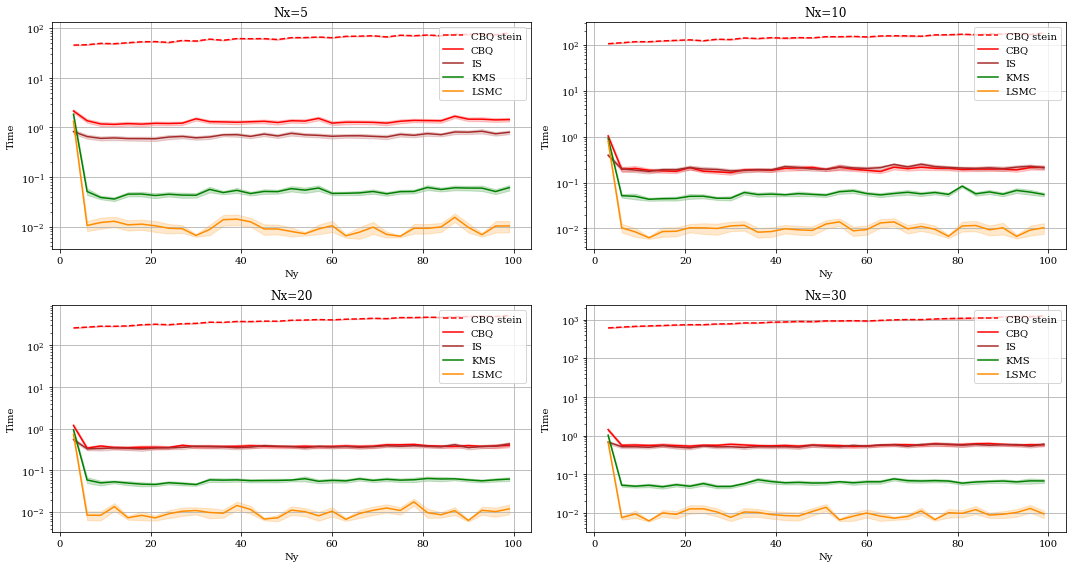

In [10]:
fig, axs = plt.subplots(int(len(Nx_array) / 2), 2, figsize=(15, len(Nx_array) * 2))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['BMC stein mean'], color='r', label=f'CBQ stein', linestyle='--')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['BMC stein mean'] - Time_dict[f"{Nx}"]['BMC stein se'], 
                        Time_dict[f"{Nx}"]['BMC stein mean'] + Time_dict[f"{Nx}"]['BMC stein se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['BMC mean'] - Time_dict[f"{Nx}"]['BMC se'], 
                        Time_dict[f"{Nx}"]['BMC mean'] + Time_dict[f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['IS mean'] - Time_dict[f"{Nx}"]['IS se'], 
                        Time_dict[f"{Nx}"]['IS mean'] + Time_dict[f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['KMS mean'] - Time_dict[f"{Nx}"]['KMS se'], 
                        Time_dict[f"{Nx}"]['KMS mean'] + Time_dict[f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['LSMC mean'] - Time_dict[f"{Nx}"]['LSMC se'], 
                        Time_dict[f"{Nx}"]['LSMC mean'] + Time_dict[f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.tight_layout()
plt.show()

In [ ]:
check the time for Nx=5.

amplitude for the kernel X

Sample the ys from multiple xs, and learn the lengthscale and amplitude for kernely Y.

Write and experiments and the hyperparameter selection in methodology.

Fix Ny and change Nx, then fix Nx and change Ny.

In [13]:
large_Nx_array = [1000]
large_Ny_array = [1000]

for Nx in large_Nx_array:
    for Ny in large_Ny_array:
        time_KMS_large = np.zeros(dir_num)
        time_LSMC_large = np.zeros(dir_num)
        time_IS_large = np.zeros(dir_num)
        
        mse_KMS_large = np.zeros(dir_num)
        mse_LSMC_large = np.zeros(dir_num)
        mse_IS_large = np.zeros(dir_num)
        
        for l, d in enumerate(dirs):
            with open(f"./finance/{d}/time_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                time_KMS_large[l] = dummy_dict['KMS']
                time_LSMC_large[l] = dummy_dict['LSMC']
                time_IS_large[l] = dummy_dict['IS']
                
            with open(f"./finance/{d}/mse_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                mse_KMS_large[l] = dummy_dict['KMS']
                mse_LSMC_large[l] = dummy_dict['LSMC']
                mse_IS_large[l] = dummy_dict['IS']

                
print('===== MSE =====')
print(f'KMS with large samples has MSE {mse_KMS_large.mean()}')
print(f'LSMC with large samples has MSE {mse_LSMC_large.mean()}')
print(f'IS with large samples has MSE {mse_IS_large.mean()}')

print('===== Time =====')
print(f'KMS with large samples has Time {time_KMS_large.mean()}')
print(f'LSMC with large samples has Time {time_LSMC_large.mean()}')
print(f'IS with large samples has Time {time_IS_large.mean()}')


===== MSE =====
KMS with large samples has MSE 0.000504835270521653
LSMC with large samples has MSE 0.008113146011601203
IS with large samples has MSE 1.7460530996322632
===== Time =====
KMS with large samples has Time 1.3902356147766113
LSMC with large samples has Time 0.7543009042739868
IS with large samples has Time 42.70437846183777
